# Parte 1



## Punto 1.1
1. Quante sono le istanze contenute nel dataset
2. Il dataset è completo?
3. Il dataset è bilanciato? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("training_set_fd.csv", sep=";")
dataset

FileNotFoundError: [Errno 2] No such file or directory: 'training_set_fd.csv'

### Numero istanze

In [ ]:
dataset.shape[0]

17998

In [ ]:
dataset.describe()

,claim_number,age_of_driver,marital_status,annual_income,high_education_ind,address_change_ind,past_num_of_claims,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,37367.655684,0.699189,0.577286,0.505001,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,2957.297249,0.458623,0.494004,0.955504,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,35554.000000,0.000000,0.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,37610.000000,1.000000,1.000000,0.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,39318.000000,1.000000,1.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,54333.000000,1.000000,1.000000,6.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


### Istanze nulle

In [ ]:
dataset.describe()

,claim_number,age_of_driver,marital_status,annual_income,high_education_ind,address_change_ind,past_num_of_claims,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,37367.655684,0.699189,0.577286,0.505001,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,2957.297249,0.458623,0.494004,0.955504,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,35554.000000,0.000000,0.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,37610.000000,1.000000,1.000000,0.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,39318.000000,1.000000,1.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,54333.000000,1.000000,1.000000,6.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [ ]:
dataset.isnull().sum()

claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64

### Bilanciamento

In [ ]:
dataset.groupby("fraud")["claim_number"].count()

fraud
0    15182
1     2816
Name: claim_number, dtype: int64

## Punto 1.2
1. Analizzare la variabile che indica l'età del guidatore e considerare solo età < 91. Rappresentare con istogramma la distribuzione dei valori.

<Axes: >

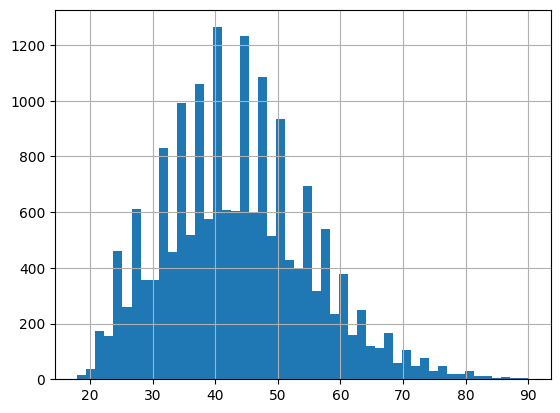

In [ ]:
under91 = dataset.copy()
under91 = under91[under91["age_of_driver"] < 91]

under91["age_of_driver"].hist(bins=50)

<Axes: >

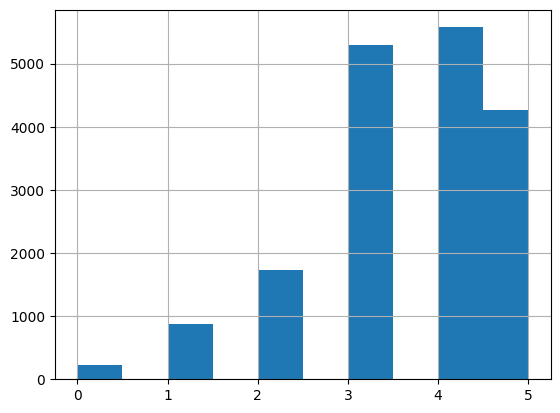

In [ ]:
under91_tr = under91.copy()
under91_tr["age_of_driver"]= pd.cut(under91_tr["age_of_driver"].values, bins=[17, 22, 26, 31, 41, 51, 90]).codes

under91_tr["age_of_driver"].hist()


In [ ]:
under91_tr_fraud = under91_tr[under91_tr["fraud"] == 1]
under91_tr_fraud.groupby("age_of_driver").count()/under91_tr.groupby("age_of_driver").count()




,claim_number,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
age_of_driver,,,,,,,,,,,,,,,,,,
0,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211,0.184211
1,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857,0.151030,0.150857,0.150857,0.150857,0.150857,0.150857,0.150857
2,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942,0.156214,0.155942,0.155942,0.155942,0.155942,0.155942,0.155942
3,0.175982,0.175982,0.176015,0.175982,0.175982,0.175982,0.175982,0.175982,0.175982,0.175982,0.175982,0.176048,0.176015,0.175982,0.175982,0.175982,0.175982,0.175982
4,0.184720,0.184720,0.184753,0.184720,0.184720,0.184720,0.184720,0.184720,0.184720,0.184720,0.184720,0.184560,0.184640,0.184720,0.184720,0.184720,0.184720,0.184720
5,0.095037,0.095037,0.095104,0.095037,0.095037,0.095037,0.095037,0.095037,0.095037,0.095037,0.095037,0.095149,0.094892,0.095037,0.095037,0.095037,0.095037,0.095037


## Punto 1.3
1. Ci sono più frodi nel gruppo di maschi under 40. In ogni caso gli under 40 commettono più frodi rispetto agli over 40 sia fra le femmine che i maschi.

In [ ]:
new_dataset = dataset.copy()
new_dataset["age_of_driver"]=np.where(new_dataset["age_of_driver"]<40,"under40","over40")
new_dataset = new_dataset[new_dataset["fraud"] == 1]
new_dataset.groupby(["gender", "age_of_driver"])["gender"].count()

gender  age_of_driver
F       over40           895
        under40          597
M       over40           798
        under40          526
Name: gender, dtype: int64

In [ ]:
new_dataset.head()

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
2,4,over40,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,over40,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
5,7,over40,F,0.0,40240,0,0,Own,Wednesday,Highway,0,Phone,5388.645056,4.0,Medium,17688.20498,black,15234.08204,1
13,20,under40,F,0.0,36635,0,1,Rent,Monday,Local,0,Phone,4650.054155,6.0,Compact,17917.04586,red,13752.12455,1
15,25,over40,M,1.0,38516,0,0,Rent,Wednesday,Local,0,Broker,6521.146712,4.0,Medium,36074.48477,blue,14712.63063,1


In [ ]:
#occorre calcolarela percentuale

## Punto 1.4


<Axes: >

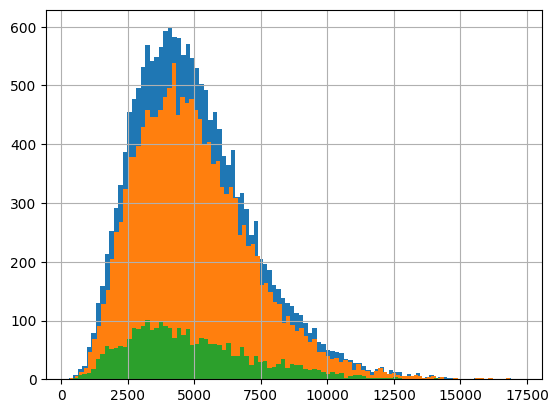

In [ ]:
new_dataset = dataset.copy()
new_dataset["claim_est_payout"].hist(bins=100) 
new_datasetnf = new_dataset[new_dataset["fraud"] == 0]
new_datasetnf["claim_est_payout"].hist(bins=100)
new_datasetf = new_dataset[new_dataset["fraud"] == 1]
new_datasetf["claim_est_payout"].hist(bins=100)  



# Parte 2
## Punto 2.1
Rimuovo il numero della richiesta in quanto identificatore



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
new_dataset = dataset.copy()
new_dataset.drop(["claim_number"], inplace=True, axis=1)
new_dataset.dropna(inplace=True)

In [ ]:
le = LabelEncoder()
fields = ["vehicle_color", "living_status",	"gender", "claim_day_of_week",	"accident_site", "channel", "vehicle_category"]
for column in fields:
  new_dataset[column] = le.fit_transform(new_dataset[column])
new_dataset

In [ ]:
Y = new_dataset["fraud"]
X = new_dataset.drop("fraud", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

train = X_train.assign(fraud=Y_train)
test = X_test.assign(fraud=Y_test)

In [ ]:
models = {'Dummy': DummyClassifier(strategy="most_frequent"),
          'Decision Tree': DecisionTreeClassifier(),
          'Logistic Regression': LogisticRegression()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = np.round(model.predict(traindata))
  testpred = np.round(model.predict(testdata))
  print(f" ===== {name} =====")
  print(f"Accuracy on train {accuracy_score(trainlabels, trainpred)}")
  print(f"Accuracy on test {accuracy_score(testlabels, testpred)}")
  print("Confusion matrix on test")
  print(confusion_matrix(testlabels, testpred))

for name, model in models.items():
  test_model(name, model, X_train, X_test, Y_train, Y_test)
# Risposta sopra

## Punto 2.2


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
for name, model in models.items():
  # Uso X e Y interi perchè farà lui la divisione in test e train
  result = cross_val_score(model, X, Y, cv=10)
  print(f" ===== {name} =====")
  print(f"Media {result.mean()}")
  print(result)


## Punto 2.3


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty': ["none", "l2"],
    'C': [0.1, 0.5, 1., 2., 3.]
}

gd = GridSearchCV(LogisticRegression(), parameters)
test_model("Logistic Regression CV", gd, X_train, X_test, Y_train, Y_test)
gd.best_params_

## Punto 2.4


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, MaxAbsScaler
new_dataset_transf = new_dataset.copy()

kb = KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="uniform")
new_dataset_transf["claim_est_payout"] = kb.fit_transform(new_dataset_transf["claim_est_payout"].values.reshape(-1, 1))
kb = KBinsDiscretizer(n_bins=20, encode="ordinal", strategy="uniform")
new_dataset_transf["vehicle_price"] = kb.fit_transform(new_dataset_transf["vehicle_price"].values.reshape(-1, 1))
new_dataset_transf

In [ ]:
mas = MaxAbsScaler()
new_dataset_transf = mas.fit_transform(new_dataset_transf)
new_dataset_transf = pd.DataFrame(new_dataset_transf, columns=new_dataset.columns)
new_dataset_transf.describe()

In [ ]:
Y_transf = new_dataset_transf["fraud"]
X_transf = new_dataset_transf.drop("fraud", axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_transf, Y_transf, test_size=1/3)

for name, model in models.items():
  test_model(name, model, X_train, X_test, Y_train, Y_test)

## Punto 2.5


In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
def identity(X):
  return X


Identity = FunctionTransformer(identity, validate=True)

discretizer = ColumnTransformer([("payout", KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="uniform"), ["claim_est_payout"]),
                                 ("vehicle_price", KBinsDiscretizer(n_bins=20, encode="ordinal", strategy="uniform"), ["vehicle_price"])])
union = FeatureUnion([("discretizer", discretizer),
                      ("allelse", Identity)])
pipeline = Pipeline(steps=[("discretizer", union),
                           ("estimator", LogisticRegression())])
test_model("Scaled Pipeline", pipeline, X_train, X_test, Y_train, Y_test)

## Punto 2.6

In [ ]:


 ===== Scaled Extended Pipeline GD =====
Accuracy on train 0.8437134747036233
Accuracy on test 0.8430717863105175
Confusion matrix on test
[[5050    0]
 [ 940    0]]

 
{'discretizer__discretizer__payout__n_bins': 10,
 'discretizer__discretizer__vehicle_price__n_bins': 5,
 'selectkbest__k': 1}


In [ ]:
from sklearn.feature_selection import SelectKBest

parameters = {
    'discretizer__discretizer__payout__n_bins': [10, 20, 30, 40, 50],
    'discretizer__discretizer__vehicle_price__n_bins': [5, 10, 15, 20, 25, 30],
    'selectkbest__k': [1, 5, 10, "all"]
}

extended_pipeline = Pipeline(steps=[("discretizer", union),
                                    ("selectkbest", SelectKBest()),
                                    ("estimator", LogisticRegression()),
                                   ])

gd = GridSearchCV(extended_pipeline, parameters)
test_model("Scaled Extended Pipeline GD", gd, X_train, X_test, Y_train, Y_test)
gd.best_params_

## Punto 2.7


In [ ]:
new_dataset = dataset.copy()
new_dataset.drop([ "claim_number"], inplace=True, axis=1)

le = LabelEncoder()
fields = ["vehicle_color","living_status",	"gender", "claim_day_of_week",	"accident_site", "channel", "vehicle_category"]
for column in fields:
  new_dataset[column] = le.fit_transform(new_dataset[column])

Y = new_dataset["fraud"]
X = new_dataset.drop("fraud", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)


In [ ]:
print(X_train.columns.get_loc("claim_est_payout"))
print(X_train.columns.get_loc("vehicle_price"))

In [ ]:
from sklearn.impute import SimpleImputer


parameters = {
    'old_pipe__discretizer__discretizer__payout__n_bins': [10],
    'old_pipe__discretizer__discretizer__vehicle_price__n_bins': [5],
    'old_pipe__selectkbest__k': [1],
    'impute__strategy': ["mean", "median", "most_frequent"]
}

discretizer = ColumnTransformer([("payout", KBinsDiscretizer(n_bins=30, encode="ordinal", strategy="uniform"), [X_train.columns.get_loc("claim_est_payout")]),
                                 ("vehicle_price", KBinsDiscretizer(n_bins=20, encode="ordinal", strategy="uniform"), [X_train.columns.get_loc("vehicle_price")])])

union = FeatureUnion([("discretizer", discretizer),
                      ("allelse", Identity)])
pipeline = Pipeline(steps=[("discretizer", union),
                           ("estimator", LogisticRegression())])

extended_pipeline = Pipeline(steps=[("discretizer", union),
                                    ("selectkbest", SelectKBest()),
                                    ("estimator", LogisticRegression()),
                                   ])
impute_pipeline = Pipeline(steps=[("impute", SimpleImputer()),
                                   ("old_pipe", extended_pipeline)])
                           
gd = GridSearchCV(impute_pipeline, parameters)
test_model("Impute pipeline", gd, X_train, X_test, Y_train, Y_test)
